### aim: 

### date: 

In [175]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [176]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [177]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

great to hear you have solved the 1985 problem. Arg indeed for the make_c14gradient_one.jnl, it is in the folder here: /gpfs/home/e415/scratch/c14 (and pasted below for convenience)



        let c14 = if c14b lt 1e10 then c14b ! remove continents 

        let c14so = c14[j=2:47@ave,i=2:181@ave] 

        let dc14dz = c14so[k=17] - c14so[k=1] ! z=217m minus z=5m 



        let ccc = if dic lt 1e10 then dic ! remove continents 

        let dicso = ccc[j=2:47@ave,i=2:181@ave] 

        let ddicdz = dicso[k=17] - dicso[k=1] ! z=217m minus z=5m 



        !list/file=dc14dz.txt/append/noh/format=(f12.3) dc14dz 

        !save/file=dc14dz.nc/append dc14dz 

        save/file=dc14dz.nc/append ddicdz 

        can data/all 

 

## look at corinne's vertical gradient 

In [178]:
tmeshf = '/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc'
tmesh = xr.open_dataset(tmeshf)
tmask = tmesh.tmask[0,0,:,:] 
area_surface = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
area_16 = tmesh.tmask[0,16,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]



In [179]:
dc14dzf = './corinneData/dc14dz.nc'
dc14dz  = xr.open_dataset(dc14dzf)

print(dc14dz)

<xarray.Dataset>
Dimensions:           (DEPTHT17_17: 1, TIME_COUNTER: 780, bnds: 2)
Coordinates:
  * DEPTHT17_17       (DEPTHT17_17) float64 216.6
  * TIME_COUNTER      (TIME_COUNTER) object 1978-01-16 04:48:00 ... 2042-12-1...
Dimensions without coordinates: bnds
Data variables:
    DEPTHT17_17_bnds  (DEPTHT17_17, bnds) float64 ...
    DC14DZ            (TIME_COUNTER, DEPTHT17_17) float32 ...
    DDICDZ            (TIME_COUNTER, DEPTHT17_17) float32 ...
Attributes:
    history:      FERRET V6.72    4-Jan-18
    Conventions:  CF-1.0


In [180]:
extract = False

if extract:
    tr = 'TOM12_TJ_C405'
    for yr in range(1940,2023):

        baseDir = '/gpfs/data/greenocean/software/runs/'
        dtype = 'ptrc'
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yr}*{dtype}*.nc'
        t2 = glob.glob(ty)
        print(t2[0])
        w = xr.open_dataset(t2[0])
        DIC_L17 = w.DIC.isel(deptht = 16).isel(y = slice(0,47)).weighted(area_16.isel(y = slice(0,47))).mean(dim = ['y','x'])
        DIC_L1 = w.DIC.isel(deptht = 0).isel(y = slice(0,47)).weighted(area_surface.isel(y = slice(0,47))).mean(dim = ['y','x'])
        B14B_L17 = w.B14B.isel(deptht = 16).isel(y = slice(0,47)).weighted(area_16.isel(y = slice(0,47))).mean(dim = ['y','x'])
        B14B_L1 = w.B14B.isel(deptht = 0).isel(y = slice(0,47)).weighted(area_surface.isel(y = slice(0,47))).mean(dim = ['y','x'])

        DC14DZ = B14B_L17-B14B_L1 
        DDICDZ = DIC_L17-DIC_L1

        savenam = f'/gpfs/home/mep22dku/scratch/SOZONE/C14/C405data/vert/C405_dc14dz_y{yr}.nc'
        data_vars = {'DC14DZ':(['time_counter'], DC14DZ.values,
        {'units': '',
        'long_name':'DC14DZ (lev16-lev0, y = slice(0,47), mean, python indexing)'}),

         'DDICDZ':(['time_counter'], DDICDZ.values,
        {'units': '',
        'long_name':'DDICDZ (lev16-lev0, y = slice(0,47), mean, python indexing)'})            

                     ,
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], DC14DZ.time_counter),

        }
        # define global attributes
        attrs = {'made in':'SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb',
        'desc': 'yearly medusa files, saving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)

        ds
        ds.to_netcdf(savenam)
    
# tin

In [196]:
extract = True

if extract:
    tr = 'TOM12_TJ_C4C5'
    for yr in range(1940,2023):

        baseDir = '/gpfs/data/greenocean/software/runs/'
        dtype = 'ptrc'
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yr}*{dtype}*.nc'
        t2 = glob.glob(ty)
        print(t2[0])
        w = xr.open_dataset(t2[0])
        DIC_L17 = w.DIC.isel(deptht = 16).isel(y = slice(0,47)).weighted(area_16.isel(y = slice(0,47))).mean(dim = ['y','x'])
        DIC_L1 = w.DIC.isel(deptht = 0).isel(y = slice(0,47)).weighted(area_surface.isel(y = slice(0,47))).mean(dim = ['y','x'])
        C14B_L17 = w.C14B.isel(deptht = 16).isel(y = slice(0,47)).weighted(area_16.isel(y = slice(0,47))).mean(dim = ['y','x'])
        C14B_L1 = w.C14B.isel(deptht = 0).isel(y = slice(0,47)).weighted(area_surface.isel(y = slice(0,47))).mean(dim = ['y','x'])

        DC14DZ = C14B_L17-C14B_L1 
        DDICDZ = DIC_L17-DIC_L1

        savenam = f'/gpfs/home/mep22dku/scratch/SOZONE/C14/C405data/vert/C4C5_dc14dzC14_y{yr}.nc'
        data_vars = {'DC14DZ':(['time_counter'], DC14DZ.values,
        {'units': '',
        'long_name':'DC14DZ (lev16-lev0, y = slice(0,47), mean, python indexing)'}),

         'DDICDZ':(['time_counter'], DDICDZ.values,
        {'units': '',
        'long_name':'DDICDZ (lev16-lev0, y = slice(0,47), mean, python indexing)'})            

                     ,
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], DC14DZ.time_counter),

        }
        # define global attributes
        attrs = {'made in':'SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb',
        'desc': 'yearly medusa files, saving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)

        ds
        ds.to_netcdf(savenam)
    
# tin

/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19400101_19401231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19410101_19411231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19420101_19421231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19430101_19431231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19440101_19441231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19450101_19451231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19460101_19461231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19470101_19471231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19480101_19481231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19490101_19491231_ptrc_T.nc
/gpfs/data/greenocean/software/runs//TOM12_TJ_C4C5/ORCA2_1m_19500101_19501231_ptrc_T.nc
/gpfs/data/greenocean/software/r

In [181]:
if extract:
    tr = 'TOM12_TJ_C4C5'
    for yr in range(1940,2023):

        baseDir = '/gpfs/data/greenocean/software/runs/'
        dtype = 'ptrc'
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yr}*{dtype}*.nc'
        t2 = glob.glob(ty)
        print(t2[0])
        w = xr.open_dataset(t2[0])
        DIC_L17 = w.DIC.isel(deptht = 16).isel(y = slice(0,47)).weighted(area_16.isel(y = slice(0,47))).mean(dim = ['y','x'])
        DIC_L1 = w.DIC.isel(deptht = 0).isel(y = slice(0,47)).weighted(area_surface.isel(y = slice(0,47))).mean(dim = ['y','x'])
        B14B_L17 = w.B14B.isel(deptht = 16).isel(y = slice(0,47)).weighted(area_16.isel(y = slice(0,47))).mean(dim = ['y','x'])
        B14B_L1 = w.B14B.isel(deptht = 0).isel(y = slice(0,47)).weighted(area_surface.isel(y = slice(0,47))).mean(dim = ['y','x'])

        DC14DZ = B14B_L17-B14B_L1 
        DDICDZ = DIC_L17-DIC_L1

        savenam = f'/gpfs/home/mep22dku/scratch/SOZONE/C14/C405data/vert/C4C5_dc14dz_y{yr}.nc'
        data_vars = {'DC14DZ':(['time_counter'], DC14DZ.values,
        {'units': '',
        'long_name':'DC14DZ (lev16-lev0, y = slice(0,47), mean, python indexing)'}),

         'DDICDZ':(['time_counter'], DDICDZ.values,
        {'units': '',
        'long_name':'DDICDZ (lev16-lev0, y = slice(0,47), mean, python indexing)'})            

                     ,
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], DC14DZ.time_counter),

        }
        # define global attributes
        attrs = {'made in':'SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb',
        'desc': 'yearly medusa files, saving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)

        ds
        ds.to_netcdf(savenam)
    
# tin

In [182]:
def make_yearlist(yrst, yrend):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'/gpfs/home/mep22dku/scratch/SOZONE/C14/C405data/vert/C4C5_dc14dzC14_y{yr}.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

C4C5ylist = make_yearlist(1940,2022)

def make_yearlist2(yrst, yrend):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'/gpfs/home/mep22dku/scratch/SOZONE/C14/C405data/vert/C405_dc14dz_y{yr}.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

C405ylist = make_yearlist2(1940,2022)

In [197]:
dc14dzf = './corinneData/dc14dz.nc'
CLQ_dc14dz  = xr.open_dataset(dc14dzf)
times = pd.date_range("1950/01/01","2014/12/01",freq='MS')
CLQ_dc14dz['TIME_COUNTER'] = times

C4C5_dc14dz = xr.open_mfdataset(C4C5ylist)
C405_dc14dz = xr.open_mfdataset(C405ylist)


def make_yearlist(yrst, yrend):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'/gpfs/home/mep22dku/scratch/SOZONE/C14/C405data/vert/C4C5_dc14dzC14_y{yr}.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

C4C5_dc14dzC14 = xr.open_mfdataset(C4C5ylist)

In [184]:
C4C5_dc14dz

<xarray.Dataset>
Dimensions:       (time_counter: 996)
Coordinates:
  * time_counter  (time_counter) object 1940-01-16 12:00:00 ... 2022-12-16 12...
Data variables:
    DC14DZ        (time_counter) float64 dask.array<chunksize=(12,), meta=np.ndarray>
    DDICDZ        (time_counter) float64 dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    made in:  SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb
    desc:     yearly medusa files, saving only variables of interest

Text(0.5, 1.0, 'DDICDZ (umol/L)')

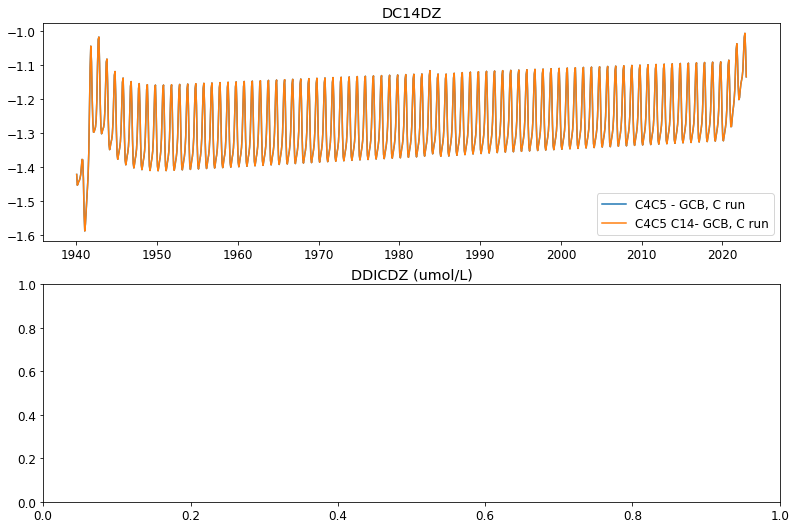

In [200]:
fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

C4C5_time = C4C5_dc14dz.indexes['time_counter'].to_datetimeindex()
CLQ_time = CLQ_dc14dz.indexes['TIME_COUNTER']

axs[0].plot(C4C5_time, C4C5_dc14dz.DC14DZ, label = 'C4C5 - GCB, C run')
axs[0].plot(C4C5_time, C4C5_dc14dzC14.DC14DZ, label = 'C4C5 C14- GCB, C run')
# axs[0].plot(C4C5_time, C405_dc14dz.DC14DZ, label = 'C405 - GCB, A run')
# axs[0].plot(CLQ_time, CLQ_dc14dz.DC14DZ, label = 'CLQ - which run?')

# axs[1].plot(C4C5_time, C4C5_dc14dz.DDICDZ* 1e6, label = 'C4C5 - GCB, C run')
# axs[1].plot(C4C5_time, C405_dc14dz.DDICDZ* 1e6, label = 'C405 - GCB, A run')
# axs[1].plot(CLQ_time, CLQ_dc14dz.DDICDZ * 1e6, label = 'CLQ - which run?')

axs[0].legend()
axs[0].set_title('DC14DZ')
axs[1].set_title('DDICDZ (umol/L)')

Text(0.5, 1.0, 'DDICDZ (umol/L)')

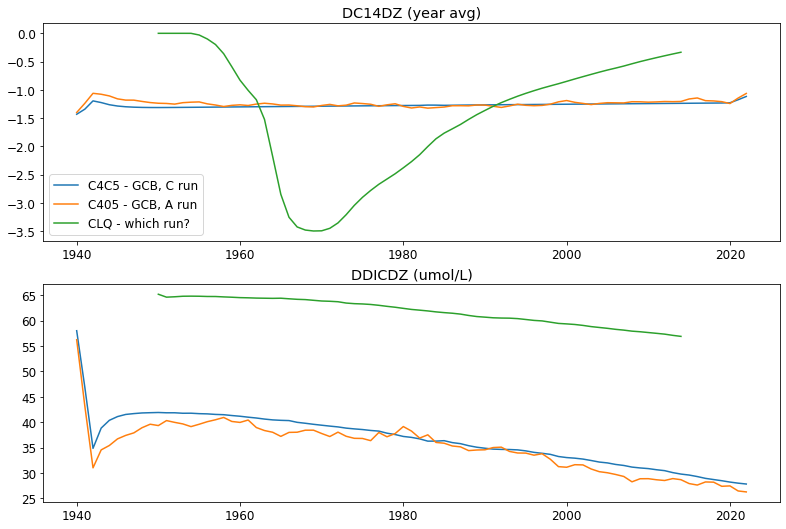

In [186]:
fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

C4C5_time = C4C5_dc14dz.indexes['time_counter'].to_datetimeindex()
CLQ_time = CLQ_dc14dz.indexes['TIME_COUNTER']
ctime = np.arange(1940,2023,1)
clqtime = np.arange(1950,2015,1)
axs[0].plot(ctime, C4C5_dc14dz.DC14DZ.groupby('time_counter.year').mean(), label = 'C4C5 - GCB, C run')
axs[0].plot(ctime, C405_dc14dz.DC14DZ.groupby('time_counter.year').mean(), label = 'C405 - GCB, A run')
axs[0].plot(clqtime, CLQ_dc14dz.DC14DZ.groupby('TIME_COUNTER.year').mean(), label = 'CLQ - which run?')

axs[1].plot(ctime, C4C5_dc14dz.DDICDZ.groupby('time_counter.year').mean()* 1e6, label = 'C4C5 - GCB, C run')
axs[1].plot(ctime, C405_dc14dz.DDICDZ.groupby('time_counter.year').mean()* 1e6, label = 'C405 - GCB, A run')
axs[1].plot(clqtime, CLQ_dc14dz.DDICDZ.groupby('TIME_COUNTER.year').mean()* 1e6, label = 'CLQ - which run?')

axs[0].legend()
axs[0].set_title('DC14DZ (year avg)')
axs[1].set_title('DDICDZ (umol/L)')

### sample DIC depth profile

In [187]:
tmask2 = tmesh.tmask.isel(t=0).isel(y = slice(0,47))

np.nanmax(tmask2.values)

1

Text(0.5, 0.98, 'TOM12_TJ_C405 run (GEE0, GCB 2023 A equivalent)')

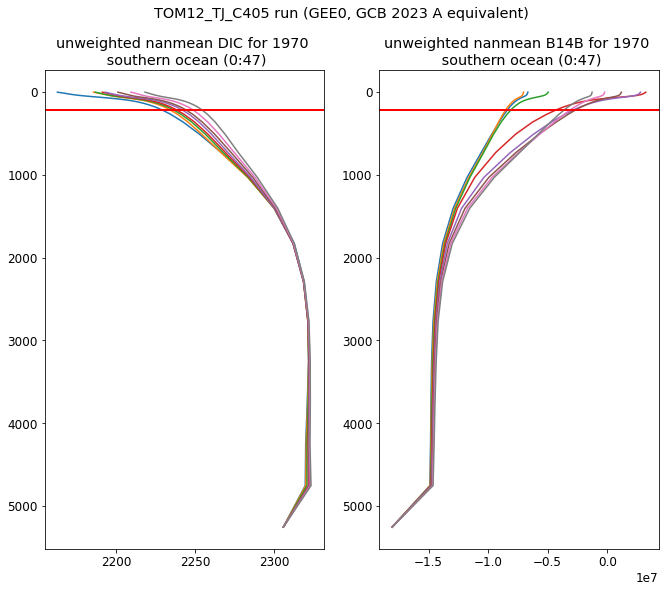

In [194]:

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(10*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

yrs = np.arange(1940,2020,10)

for i in yrs:

    w = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_C405/ORCA2_1m_{i}0101_{i}1231_ptrc_T.nc')
    
    DIC = w.DIC.values
    DIC[DIC == 0] = np.nan
    DICmn = np.nanmean(DIC, axis = 0)
    DICmn2 = np.nanmean(np.nanmean(DICmn[:,0:47,:], axis = 1), axis = 1) * 1e6

    B14B = w.C14B.values
    B14B[B14B == 0] = np.nan
    B14Bmn = np.nanmean(B14B, axis = 0)
    B14Bmn2 = np.nanmean(np.nanmean(B14Bmn[:,0:47,:], axis = 1), axis = 1) * 1e6



    axs[0].plot(DICmn2, w.deptht, label = f'y {i}')

    axs[0].axhline(y = w.deptht[16], color = 'r')
    axs[0].set_title('unweighted nanmean DIC for 1970 \n southern ocean (0:47)')

    axs[1].plot(B14Bmn2, w.deptht, label = f'y {i}')
    axs[1].invert_yaxis()
    axs[1].axhline(y = w.deptht[16], color = 'r')
    axs[1].set_title('unweighted nanmean B14B for 1970 \n southern ocean (0:47)')

    
axs[0].invert_yaxis()
axs[1].invert_yaxis()
    
plt.suptitle('TOM12_TJ_C405 run (GEE0, GCB 2023 A equivalent)')

In [189]:
print('compute complete')

compute complete


Text(0.5, 0.98, 'TOM12_TJ_C405 run (GEE0, GCB 2023 A equivalent)')

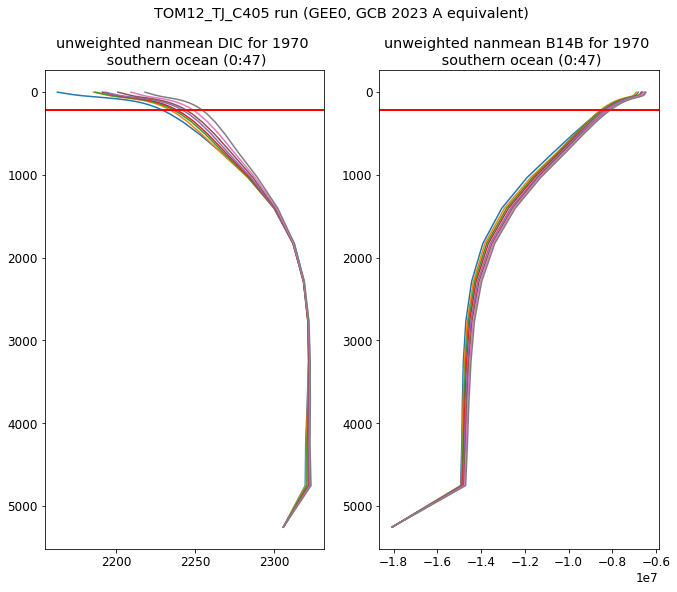

In [201]:

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(10*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

yrs = np.arange(1940,2020,10)

for i in yrs:

    w = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_C405/ORCA2_1m_{i}0101_{i}1231_ptrc_T.nc')
    
    DIC = w.DIC.values
    DIC[DIC == 0] = np.nan
    DICmn = np.nanmean(DIC, axis = 0)
    DICmn2 = np.nanmean(np.nanmean(DICmn[:,0:47,:], axis = 1), axis = 1) * 1e6

    B14B = w.B14B.values
    B14B[B14B == 0] = np.nan
    B14Bmn = np.nanmean(B14B, axis = 0)
    B14Bmn2 = np.nanmean(np.nanmean(B14Bmn[:,0:47,:], axis = 1), axis = 1) * 1e6



    axs[0].plot(DICmn2, w.deptht, label = f'y {i}')

    axs[0].axhline(y = w.deptht[16], color = 'r')
    axs[0].set_title('unweighted nanmean DIC for 1970 \n southern ocean (0:47)')

    axs[1].plot(B14Bmn2, w.deptht, label = f'y {i}')
    axs[1].invert_yaxis()
    axs[1].axhline(y = w.deptht[16], color = 'r')
    axs[1].set_title('unweighted nanmean B14B for 1970 \n southern ocean (0:47)')

    
axs[0].invert_yaxis()
axs[1].invert_yaxis()
    
plt.suptitle('TOM12_TJ_C405 run (GEE0, GCB 2023 A equivalent)')

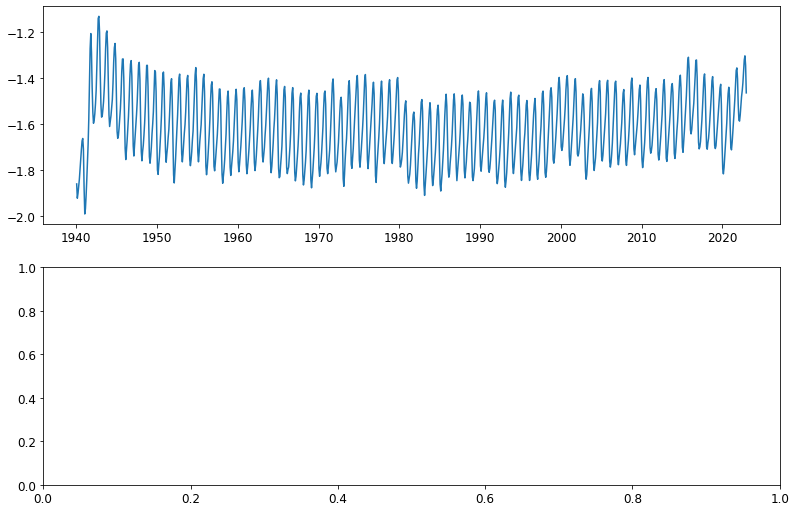

In [206]:
w = xr.open_dataset('/gpfs/home/e415/scratch/from_Tereza/GEA1/dc14dz.nc')
w

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tdat = w.indexes['TIME_COUNTER'].to_datetimeindex()
axs[0].plot(tdat, w.DC14DZ)